# Importing the Libraries

In [3]:
# importing the all libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [4]:
# Loading the dataset
df=pd.read_csv("Copy of heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
#checking the datatypes
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
# checking the stastical summary
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
# Checking the missing Values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [9]:
# Handiling the missing Values
df['oldpeak']=df.oldpeak.fillna(df.oldpeak.median())

# Data Visualization

<Axes: ylabel='count'>

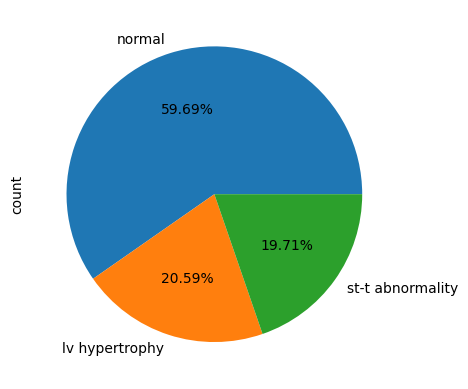

In [10]:
# plotting barchart for restecg
df['restecg'].value_counts().plot(kind='pie',autopct="%0.2f%%")

<Axes: xlabel='num'>

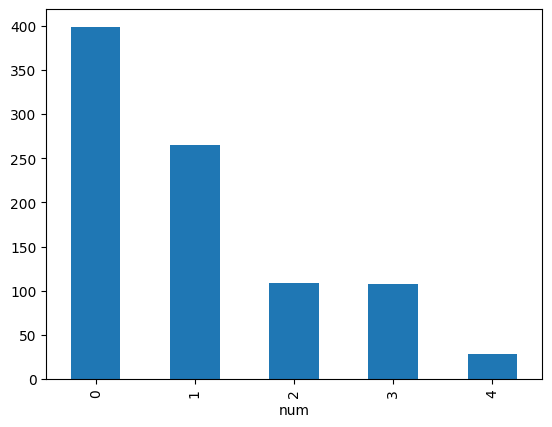

In [11]:
# plotting the barchart for target column
df["num"].value_counts().plot(kind='bar')

#### Here most of the candiadates heart rythm have the normal

<Axes: xlabel='thal'>

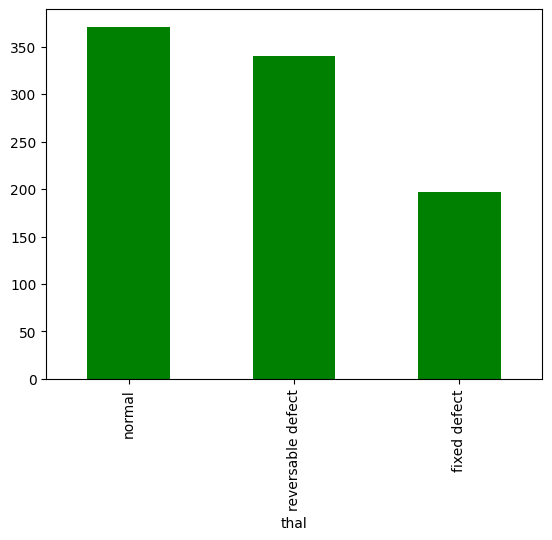

In [12]:
# plotting the barchart for thal feature
df["thal"].value_counts().plot(kind='bar',color='Green')

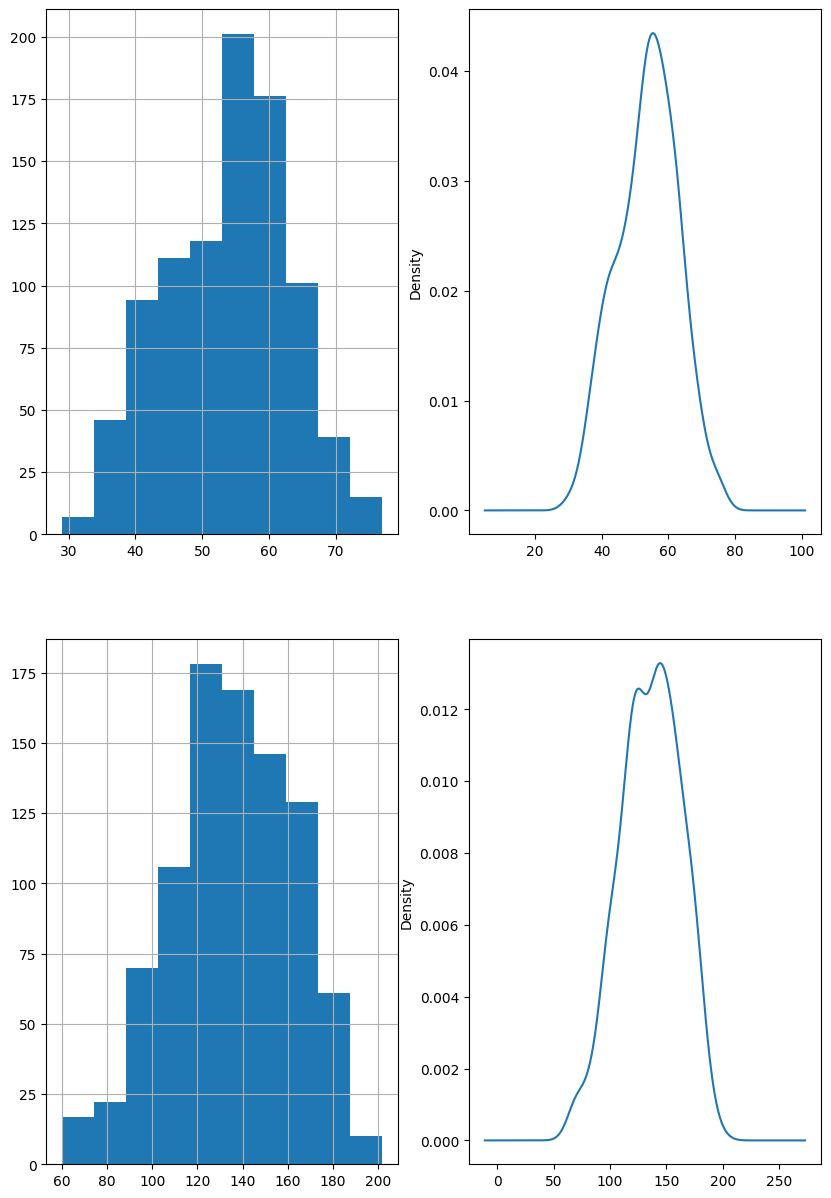

In [13]:

fig,ax=plt.subplots(figsize=(10,15),nrows=2,ncols=2)
# histogram and kde for Age feature
df['age'].hist(ax=ax[0,0])
df['age'].plot(kind='kde',ax=ax[0,1])
# histogram and kde for thalch feature
df['thalch'].hist(ax=ax[1,0])
df['thalch'].plot(kind='kde',ax=ax[1,1])
plt.show()



#### Here both data distributions are looks like a symmetric but they are actually negatively skewed

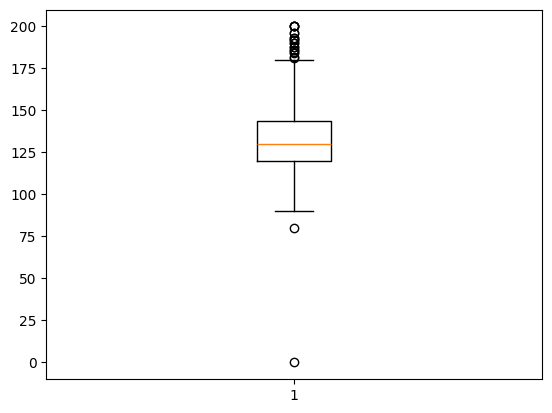

In [14]:
# In the given dataset the trestbps,chol,oldpeak
box_t=plt.boxplot(df["trestbps"])
plt.show()
list=[x.get_ydata() for x in box_t['fliers']]
df.loc[df['trestbps']<90,'trestbps']=90
df.loc[df['trestbps']>180,'trestbps']=180

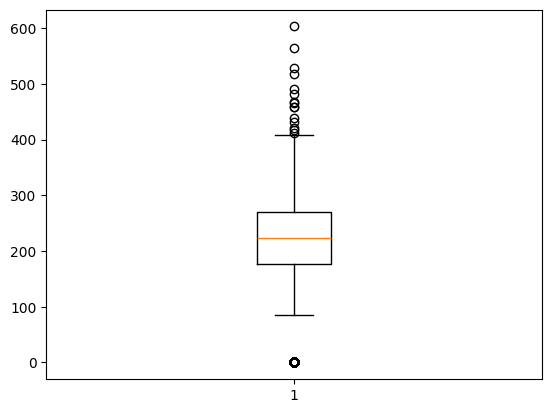

In [15]:
#boxplot for chol feature
box_C=plt.boxplot(df["chol"])
list=[x.get_ydata() for x in box_C['fliers']]
df.loc[df['chol']<85,'chol']=85
df.loc[df['chol']>409,'chol']=409

In [16]:
#Treating the chol feature values where equal to zero
# because the chol value cannot be zero for any candiadate
list2=[x.get_ydata()[0] for x in box_C['caps']]
df.loc[df['chol']==0,'chol']=85

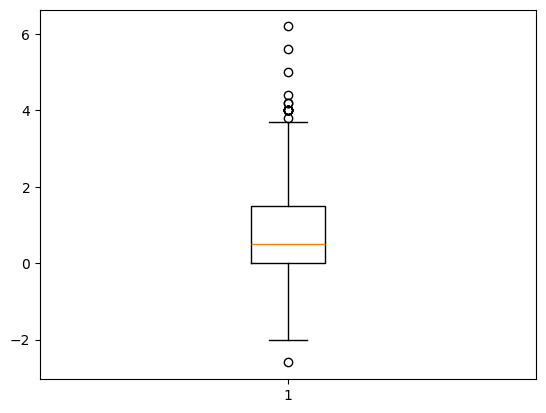

In [17]:
# boxplot for oldpeak feature
box_o=plt.boxplot(df["oldpeak"])
plt.show()
list=[x.get_ydata() for x in box_o['fliers']]
df.loc[df['oldpeak']>3.7,'oldpeak']=3.7

In [18]:
# calculating the correlation
data=df.select_dtypes('number')
corr=data.corr("pearson")

<Axes: >

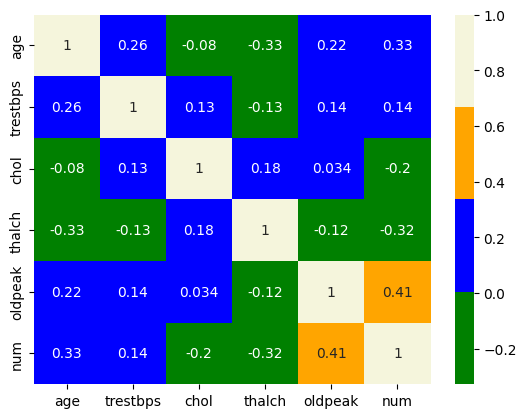

In [19]:
# plotting the heatmap for the correaltion values
sns.heatmap(corr,annot=True,cmap=["Green","Blue","orange","Beige"])

#### Here all are weakly correlated and only few are moderately correlated

# Data Preprocessing

In [20]:
# applying the label encoding to categorical columns
lab=LabelEncoder()
df['sex']=lab.fit_transform(df["sex"])
df['cp']=lab.fit_transform(df['cp'])
df['restecg']=lab.fit_transform(df['restecg'])
df["slope"]=lab.fit_transform(df['slope'])
df["thal"]=lab.fit_transform(df['thal'])
df['fbs']=lab.fit_transform(df['fbs'])
df['exang']=lab.fit_transform(df['exang'])

In [21]:
# defining the indepedent and depedent features
x=df.iloc[:,0:12]
y=df['num']

In [22]:
# scaling the features
scal=scale(x)
x=pd.DataFrame(scal,columns=x.columns)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,0.514416,2.320276,0.607732,0.203357,1.976894,-1.561352,0.524183,-0.787899,1.413721,-1.672770,-1.537715
1,-1.397560,0.514416,0.232258,0.088469,-0.165472,-0.505844,0.013879,-0.147705,-0.787899,-0.834368,-0.224843,-1.537715
2,0.350503,0.514416,-0.811752,0.348100,-0.300709,-0.505844,0.013879,0.449529,-0.787899,-0.443396,-0.224843,-1.537715
3,-0.195767,0.514416,2.320276,-0.794277,-0.374475,-0.505844,-1.561352,2.017268,-0.787899,-0.834368,-0.224843,-1.537715
4,0.350503,0.514416,-0.811752,-1.209687,-0.190061,-0.505844,0.013879,-0.371668,0.961275,0.631777,-0.224843,-1.537715
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,0.514416,-0.811752,-0.430793,-1.616198,-0.505844,0.013879,-0.595631,-0.787899,0.631777,1.223083,-0.209223
904,0.896773,0.514416,-0.811752,1.698183,-0.571184,-0.505844,1.589110,-0.595631,0.961275,2.097922,-0.224843,-1.537715
905,0.241249,0.514416,1.276267,1.905888,-1.616198,-0.505844,-1.561352,-0.483649,0.961275,1.609207,-1.672770,-1.537715
906,0.241249,0.514416,1.276267,0.555805,-0.104000,1.976894,1.589110,-1.155538,2.710449,-0.345653,-1.672770,-0.209223


# Splitting Step

In [23]:
# splitting the depedent and indepedent variables into train and test splits
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Modeling

In [24]:
# Building Decision Tree Based on criterion Entropy
model=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=10)
Kfold=KFold(n_splits=10,shuffle=True)
cross=cross_val_score(model,x_train,y_train,cv=Kfold)
cross.mean()

np.float64(0.5221461187214611)

#### Here i choose the max_depth randomly ,it gives the best accuracy on training data but when it comes to testing data it performs the low.

In [25]:
# using the GridSearchCv for hyperparameter turming with parameters
# such as max_depth,min_samples_split,criterion
max_d=np.array(range(1,11))
min_samples_split=np.array(range(2,11))
criterion=["entropy","gini"]
param_grid=dict(max_depth=max_d,min_samples_split=min_samples_split,criterion=criterion)
grid=GridSearchCV(estimator=model,param_grid=param_grid)


In [43]:
#Training the model with x_train and y_train
# finding the best score,params,estimator
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.533112895606991
{'criterion': 'entropy', 'max_depth': np.int64(1), 'min_samples_split': np.int64(2)}
DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(1),
                       min_samples_split=np.int64(2))


In [36]:
# Predicting the output for testing data with best_estimator
model=grid.best_estimator_
y_pred=grid.predict(x_test)

In [41]:
# feature importance
model.feature_importances_

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Here the Chest Pain(cp) feature have the most importance

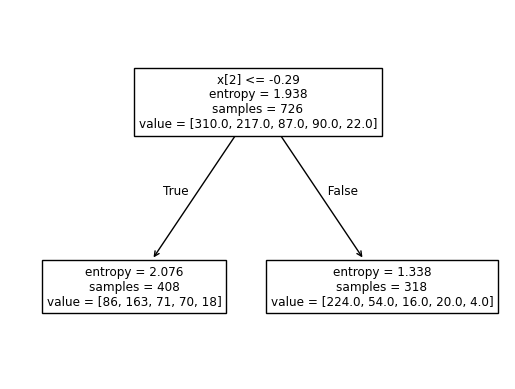

In [42]:
# Plotting the tree
tree.plot_tree(model)
plt.show()

# Model Evaluation

In [29]:
# calculating the accuracy
print(accuracy_score(y_test,y_pred))

0.5824175824175825


In [30]:
# calculating the precision
import warnings
warnings.filterwarnings('ignore')
precision_score(y_test,y_pred,average=None)

array([0.75789474, 0.3908046 , 0.        , 0.        , 0.        ])

#### Here precision of 1st class(0->No disease) is only high remaining all classes  are low

In [31]:
# calculating the f1-score
f1_score(y_test,y_pred,average=None)

array([0.7826087, 0.5037037, 0.       , 0.       , 0.       ])

In [32]:
# calculating the recall
recall_score(y_test,y_pred,average=None)

array([0.80898876, 0.70833333, 0.        , 0.        , 0.        ])

#### Here recall score of first and second classes are high and remaining all are low

#### Here ROC-AOC is not support,when multiple classes are present in the target variable

#### Here, Decision tree is overfitting when the max_depth value increases

# Interview Questions

#### In decision tree common hyperparameters are criterion,max_depth,min_samples_split.
#### criterion is used to choose the type of metrics which split the root node based on metrics such as entropy,Gini.
#### max_depth is used to decide until which level decision tree will be splited.it prevents the model overfitting.
#### min_samples_split is used to decide how namy samples will be present in the root node during spliting the tree.it reduces model overfitting.  

#### In OneHotEncoder,each class in the mentioned categorical column is converted into binary format(0,1) with seperate column.
#### It is difficult when some many categorical columns are there.
#### In label Encoder,each class in mentioned categorical column is assigned to a different numeric value. it assigns based on ascii value of the class.